<a href="https://colab.research.google.com/github/Sourav56/ANN/blob/master/LR_in_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the data set and important Libraries.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving days_storage.csv to days_storage.csv


In [ ]:
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['days_storage.csv'].decode('utf-8')), skipinitialspace= True)
data.head()

,Days,Margin,Cost,Rev,GM
0,1,20.0,100,125.000000,25.000000
1,1,20.2,100,125.313283,25.313283
2,1,24.6,100,132.625995,32.625995
3,1,20.3,100,125.470514,25.470514
4,1,21.3,100,127.064803,27.064803


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.describe()

,Days,Margin,Cost,Rev,GM
count,746.000000,746.000000,746.0,746.000000,746.000000
mean,4.699732,17.103812,100.0,125.311308,25.311308
std,2.838078,30.910730,0.0,14.072383,14.072383
min,1.000000,-434.130111,100.0,18.722030,-81.277970
25%,3.000000,20.301694,100.0,125.473182,25.473182
50%,4.000000,21.570070,100.0,127.502345,27.502345
75%,6.000000,23.500000,100.0,130.718954,30.718954
max,22.000000,28.200000,100.0,139.275766,39.275766


**As we can see that there is a lot of diff betwwen min and max values , so we could have possible outliers, better to standardize while modelling**

In [ ]:
data.isnull().sum()  ### no null values

Days      0
Margin    0
Cost      0
Rev       0
GM        0
dtype: int64

In [ ]:

data_new = data.copy()
data_New = data_new.drop(columns = {'Margin','Rev','Cost'}, inplace = True)


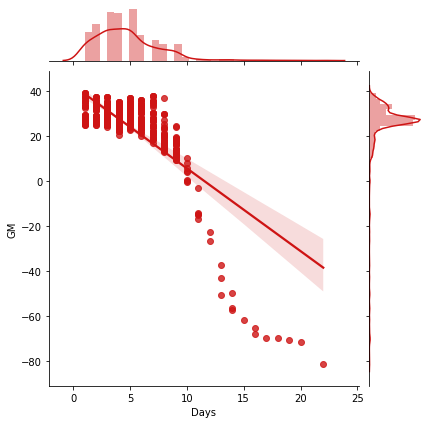

In [ ]:
sns.jointplot(data_new.loc[:,'Days'], data_new.loc[:,'GM'], kind="regg", color="#ce1414")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


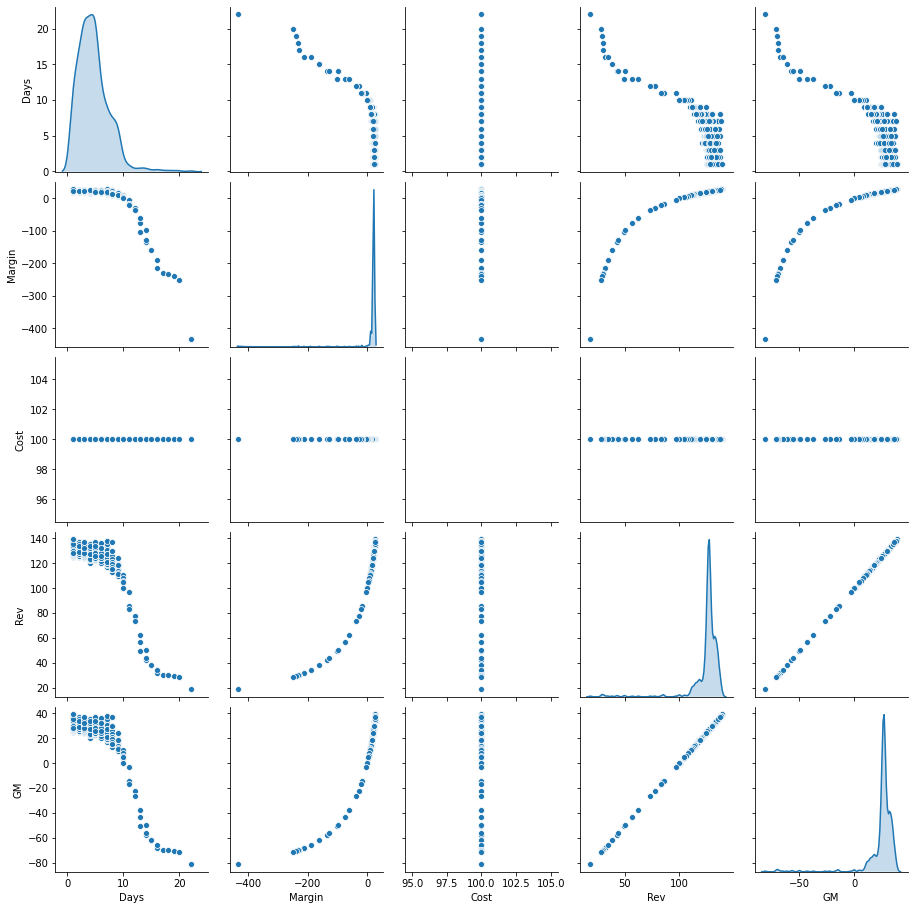

In [ ]:
sns.pairplot(data, diag_kind = "kde");

**From the figure it is evident that they are  Negatively coorelated to each other, so we can build a model on this data, but we need to deal with the heavy points or outliers if any**

In [ ]:
data_new.head()

,Days,GM
0,1,25.000000
1,1,25.313283
2,1,32.625995
3,1,25.470514
4,1,27.064803


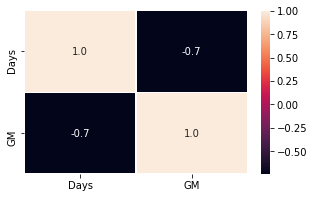

In [ ]:
f,ax = plt.subplots(figsize=(5, 3))
sns.heatmap(data_new.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) #### AS evident from pair plot Negative correlation

**Plotting a scatter plot**

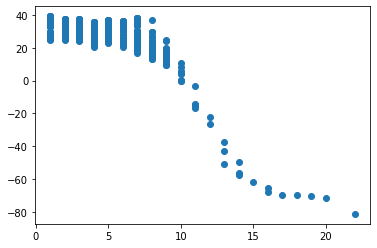

In [ ]:
plt.scatter(data_new['Days'],data_new['GM'])

*Lets directly fit the reg model with different optimizers and see the results*

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
x = data[['Days']].values
y = data[['GM']].values      ##### considering X = Days and Y = GM only 2 features out of 5

In [ ]:
from sklearn.model_selection import train_test_split  ## splitting the data for train ,val ,and test
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((596, 1), (150, 1), (596, 1), (150, 1))

# Model1 : Linear Regression with ADAM and MSE

In [ ]:
###### Model1: using ADam optimizer 
  ##forward pass 
layer1 = tf.keras.layers.Dense(units = 1, input_shape= [1])
model = tf.keras.Sequential([layer1])
### backward pass & otimizer
model.compile(loss= 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['mae','mse'])

history = model.fit(x_train,y_train, epochs = 1000, verbose = 2, validation_split=0.2)
  

Epoch 1/1000
15/15 - 0s - loss: 691.8231 - mae: 24.2600 - mse: 691.8231 - val_loss: 564.0479 - val_mae: 21.0797 - val_mse: 564.0479
Epoch 2/1000
15/15 - 0s - loss: 537.9639 - mae: 19.3383 - mse: 537.9639 - val_loss: 479.1055 - val_mae: 18.0691 - val_mse: 479.1055
Epoch 3/1000
15/15 - 0s - loss: 498.8743 - mae: 17.1091 - mse: 498.8743 - val_loss: 448.7056 - val_mae: 16.6762 - val_mse: 448.7056
Epoch 4/1000
15/15 - 0s - loss: 483.0771 - mae: 16.0756 - mse: 483.0771 - val_loss: 430.2633 - val_mae: 16.1221 - val_mse: 430.2633
Epoch 5/1000
15/15 - 0s - loss: 460.9540 - mae: 15.7008 - mse: 460.9540 - val_loss: 412.1628 - val_mae: 15.7798 - val_mse: 412.1628
Epoch 6/1000
15/15 - 0s - loss: 440.6277 - mae: 15.5241 - mse: 440.6277 - val_loss: 394.9297 - val_mae: 15.6619 - val_mse: 394.9297
Epoch 7/1000
15/15 - 0s - loss: 422.1987 - mae: 15.4019 - mse: 422.1987 - val_loss: 377.0065 - val_mae: 15.3136 - val_mse: 377.0065
Epoch 8/1000
15/15 - 0s - loss: 404.8193 - mae: 14.9463 - mse: 404.8193 - va

In [ ]:
model.summary()### looking at what we actually loaded inside the model 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


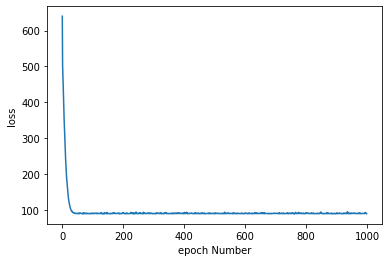

In [ ]:
plt.xlabel('epoch Number') ### Loss for no Epochs
plt.ylabel("loss")
plt.plot(history.history['loss'])
plt.show()   ### in the below figure we can see that the after around 800 iterations the loss is saturated we can try early stopping for better computational performance

model = Sequential(layers=[
                             layers.Dense(units = 1, input_shape= (1,))

In [ ]:
print('prediction:{}'.format(model.predict([8])))  ### testing the model on random prediction

prediction:[[13.905981]]


##Printing the model weights and  modelfit line

weight:[-3.6651602] bias:[42.40359]


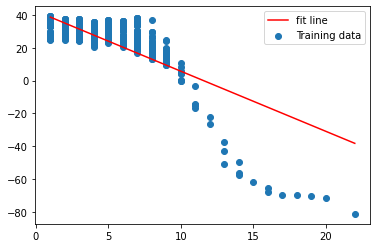

In [ ]:
weights = layer1.get_weights()
weight = weights[0][0]
bias =  weights[1]
print('weight:{} bias:{}'.format(weight, bias))
y_pred = x * weight + bias
plt.scatter(x,y,label = 'Training data')
plt.plot(x,y_pred,color = 'red', label ='fit line')
plt.legend()
plt.show()

weight:[-3.7317936] bias:[42.56661]


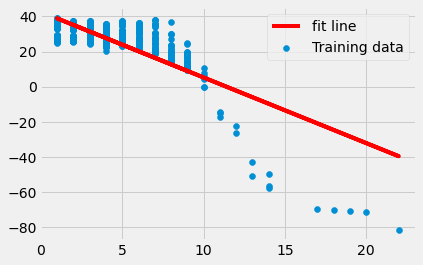

In [ ]:
## approach two
weights = model.get_weights()
weight = weights[0][0]
bias =  weights[1]
print('weight:{} bias:{}'.format(weight, bias))
y_pred = x_train * weight + bias
plt.scatter(x_train,y_train,label = 'Training data')
plt.plot(x_train,y_pred,color = 'red', label ='fit line')
plt.legend()
plt.show()

# Model1 :Evaluation,predictions, MAE,MSE,R2,LOSS

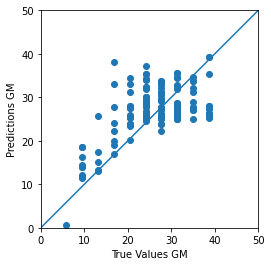

In [ ]:
y_pred_new = x_test * weight + bias
test_predictions = model.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_pred_new, y_test)
plt.xlabel('True Values GM')
plt.ylabel('Predictions GM')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
loss, mae, mse = model.evaluate(x_test,y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} GM".format(mae))

5/5 - 0s - loss: 102.9502 - mae: 6.5237 - mse: 102.9502
Testing set Mean Abs Error:  6.52 GM


In [ ]:
pred = model.predict(x_test)
def R_squared(y_test, pred):
  residual = tf.math.reduce_sum(tf.math.square(tf.math.subtract(y_test, pred)))
  total = tf.math.reduce_sum(tf.square(tf.subtract(y_test, tf.math.reduce_mean(y_test))))
  r2 = tf.subtract(1.0, tf.math.divide(residual, total))
  return r2

Training **R2**

In [ ]:
R_squared(y_train, y_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.5404543920262863>

Testing **R2**

In [ ]:
R_squared(y_test,pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.5796351146702652>

##Model 1 : R2 on trainning =54% and on Test it is = 57% very poor model lets see SGD , which means the explainability is very less with following features and we need more data and features for better results.

##Model 2: using SGD optimizer and MAE

In [ ]:
  ##forward pass 
layer2 = tf.keras.layers.Dense(units = 1, input_shape= [1])
model2 = tf.keras.Sequential([layer2])
### backward pass & optimizer

model2.compile(loss= tf.keras.losses.MeanAbsoluteError() , optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),metrics=['mae','mse'])
history = model2.fit(x_train,y_train, epochs = 1000, verbose = 2,validation_split=0.2)
  

Epoch 1/1000
15/15 - 0s - loss: 33.6547 - mae: 33.6547 - mse: 1166.5592 - val_loss: 33.6200 - val_mae: 33.6200 - val_mse: 1157.2897
Epoch 2/1000
15/15 - 0s - loss: 33.4026 - mae: 33.4026 - mse: 1149.6323 - val_loss: 33.3633 - val_mae: 33.3633 - val_mse: 1140.4615
Epoch 3/1000
15/15 - 0s - loss: 33.1520 - mae: 33.1520 - mse: 1133.3252 - val_loss: 33.1098 - val_mae: 33.1098 - val_mse: 1124.0588
Epoch 4/1000
15/15 - 0s - loss: 32.9096 - mae: 32.9096 - mse: 1117.0691 - val_loss: 32.8585 - val_mae: 32.8585 - val_mse: 1108.0023
Epoch 5/1000
15/15 - 0s - loss: 32.6679 - mae: 32.6679 - mse: 1101.1836 - val_loss: 32.6076 - val_mae: 32.6076 - val_mse: 1092.1924
Epoch 6/1000
15/15 - 0s - loss: 32.4268 - mae: 32.4268 - mse: 1085.4418 - val_loss: 32.3574 - val_mae: 32.3574 - val_mse: 1076.6290
Epoch 7/1000
15/15 - 0s - loss: 32.1860 - mae: 32.1860 - mse: 1070.1973 - val_loss: 32.1064 - val_mae: 32.1064 - val_mse: 1061.2272
Epoch 8/1000
15/15 - 0s - loss: 31.9445 - mae: 31.9445 - mse: 1055.2244 - va

###*Visualizing and printing , weights, fit line and loss*

In [ ]:
model2.get_weights()

[array([[4.0664682]], dtype=float32), array([6.805923], dtype=float32)]

weight: [4.0664682]bias:[6.805923]


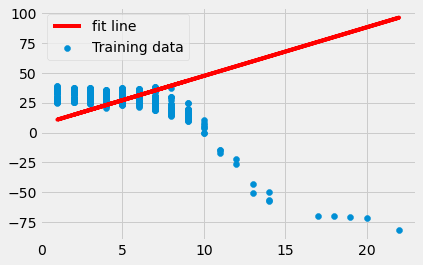

In [ ]:

weights_new = model2.get_weights()
weight1 = weights_new[0][0]
bias1 =  weights_new[1]
print('weight: {}' 'bias:{}'.format(weight1, bias1))
y_pred2 = x_train * weight1 + bias1       
plt.scatter(x_train,y_train,label = 'Training data')
plt.plot(x_train,y_pred2,color = 'red', label ='fit line')
plt.legend()
plt.show()

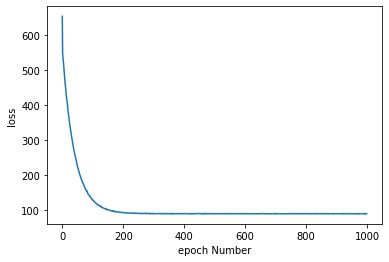

In [ ]:
plt.xlabel('epoch Number')
plt.ylabel("loss")
plt.plot(history.history['loss'])
plt.show()    ##### Loss vs no of epochs for the second model using SGd

# Model 2 Evaluation, MAE,MSE,R2,LOSS

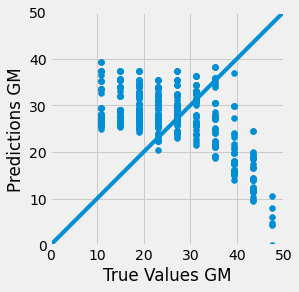

In [ ]:

a = plt.axes(aspect='equal')
plt.scatter(y_pred2, y_train)#### using (y_pred2,y_train) or y_test,test_output anything yields the samme output
plt.xlabel('True Values GM')
plt.ylabel('Predictions GM')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

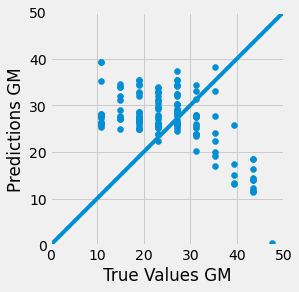

In [ ]:
test_output = model2.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter( test_output,y_test)
plt.xlabel('True Values GM')
plt.ylabel('Predictions GM')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
pred2 = model2.predict(x_test)

In [ ]:
loss, mae, mse = model2.evaluate(x_test,y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} GM".format(mse))

5/5 - 0s - loss: 14.4482 - mae: 14.4482 - mse: 662.6223
Testing set Mean Abs Error: 662.62 GM


In [ ]:
#### R2 calculation*************
def R_squared2(test, prediction):
  residual = tf.math.reduce_sum(tf.math.square(tf.math.subtract(test, prediction)))
  total = tf.math.reduce_sum(tf.square(tf.subtract(test, tf.math.reduce_mean(test))))
  r2 = tf.subtract(1.0, tf.math.divide(residual, total))
  return r2

Training R2

In [ ]:
R_squared2(y_train,y_pred2)

<tf.Tensor: shape=(), dtype=float64, numpy=-1.9528681960431746>

Testing R2

In [ ]:
R_squared2(y_test,pred2)

<tf.Tensor: shape=(), dtype=float64, numpy=-1.7234648067543339>

Mode2 R2 = -17 % is not that of Linear reg with ADam only the Loss is less when compared to the Model1
****Since the coeff of determination is just -Ve the data is non linear , i.e: more data and features are needed to predict good results hence regression only on 2 features of this data is not recommended**

##**Residual Analysis**

In [ ]:
def Resid(X,Y):  #### function for calculating Homo and Heteroscedasticity
  residuals = (tf.math.square(tf.math.subtract(X, Y)))
  residuals_fitted = (tf.math.square(tf.math.subtract(X, Y)))
  tensor_new = tf.convert_to_tensor(X,dtype= tf.float64)
  plt.style.use('fivethirtyeight')
  plt.scatter( X ,Y )
  plt.ylabel('Residuals')
  plt.show();




## Analysis for model 2:

## **Residuals vs Predicted Values**

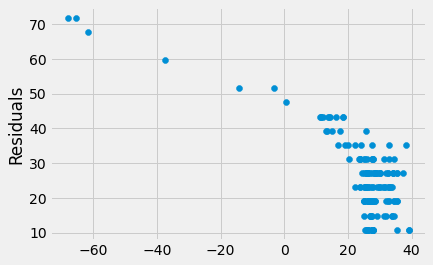

<Figure size 432x288 with 0 Axes>

In [ ]:
Resid(y_test,pred2)
plt.tight_layout();

## **Residuals vs Fitted**

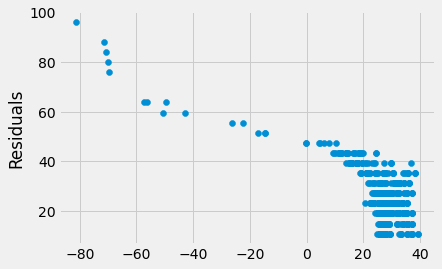

In [ ]:
Resid(y_train,y_pred2)   ### calling the resid function

# Residual Analysis for Model1
##**Residual vs predicted**

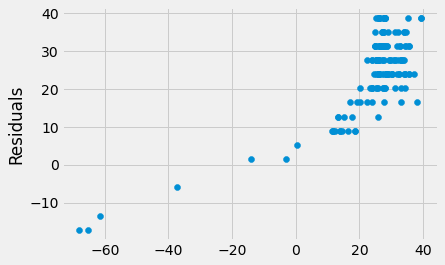

In [ ]:
Resid(y_test,pred)

## **Residuals vs Fitted**

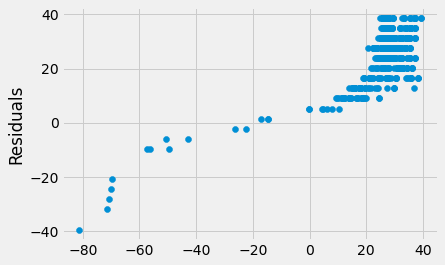

In [ ]:
Resid(y_train,y_pred)

**From the above plots we can conclude that the residuals do not follow Homoscedasticity , they also do not follow normal distribution ,hence the data is not sufficient for the Regression analysis**

### Cooks Distance
![image](https://espin086.files.wordpress.com/2013/12/cooks-distance.jpg)

In [ ]:
### in the above formula : p = (p+1), p = no 0f coefficients
import numpy as np

####MODEl2 Cooks distance
def cooks(s,r,mse):
  s= s.astype('float32')
  cooks_distance = tf.math.reduce_sum(tf.math.square(tf.math.subtract(s, r)))
  p = tf.math.add(2,1)
  sig = tf.math.multiply(p,mse)
  sig = tf.cast(sig, tf.float32)
  D_lev = tf.math.divide(cooks_distance,sig)
  return D_lev


**Cooks distance for Model : 2**

In [ ]:
cooks(y_test,pred2,663)   ## Mse = 662.9 from evaluation above

<tf.Tensor: shape=(), dtype=float32, numpy=49.97151>

**Cooks distance for Model : 1**

In [ ]:
cooks(y_test,pred,103)     ### Mse = 102.9 from evaluation above

<tf.Tensor: shape=(), dtype=float32, numpy=49.321728>

### From cooks distance D > 1 hence that indiacates that there are influiential or leverage points and data is not sutiable for Linear approximation

# Variation Inflation Factor 

#### 1 / (1- R^2)

In [ ]:
def VIF(t):
  vary = tf.math.subtract(1,t)
  inf = tf.math.divide(1,vary)
  return inf

In [ ]:
VIF(57)   ### model 1 VIF

<tf.Tensor: shape=(), dtype=float64, numpy=-0.017857142857142856>

In [ ]:
VIF(-17)  ### model 2 VIF

<tf.Tensor: shape=(), dtype=float64, numpy=0.05555555555555555>

### VIF is very low not even nearer to one , this indicates that Days is not a good Predictor of GM